# Regression modeling

A general, primary goal of many statistical data analysis tasks is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or perhaps a how baseball player's performance varies as a function of age.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import fmin

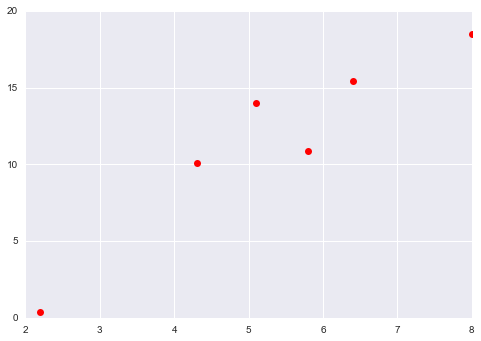

In [2]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,'ro')

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

<div style="font-size: 150%;">  
$y_i = f(x_i) + \epsilon_i$
</div>

where $f$ is some function, for example a linear function:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as **process uncertainty**.

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between $\hat{y}$ and $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: (1) to prevent positive and negative values from cancelling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model.

In [3]:
sum_of_squares = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)

In [4]:
sum_of_squares([0,1],x,y)

333.35000000000002

In [5]:
b0,b1 = fmin(sum_of_squares, [0,1], args=(x,y))
b0,b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

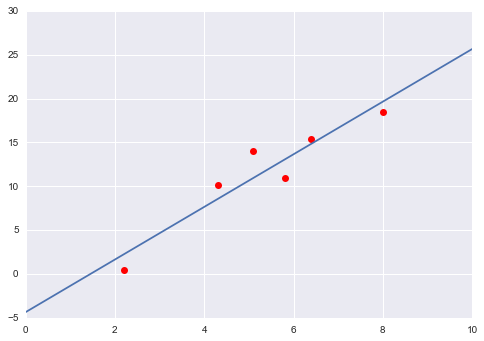

In [6]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])

(0, 20)

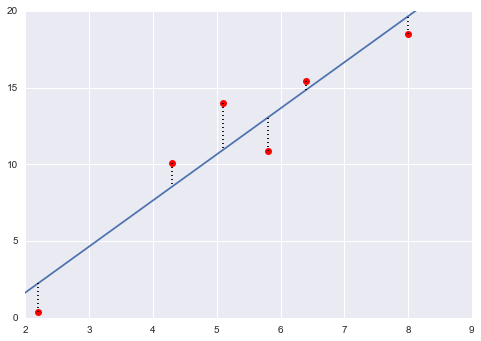

In [7]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2, 9); plt.ylim(0, 20)

Minimizing the sum of squares is not the only criterion we can use; it is just a very popular (and successful) one. For example, we can try to minimize the sum of absolute differences:

In [8]:
sum_of_absval = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77

intercept: 0.0016, slope: 2.3


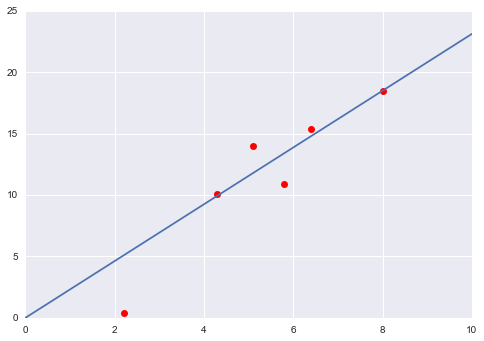

In [9]:
b0,b1 = fmin(sum_of_absval, [0,1], args=(x,y))
print('\nintercept: {0:.2}, slope: {1:.2}'.format(b0,b1))
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])

We are not restricted to a straight-line regression model; we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>

In [10]:
sum_squares_quad = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2)) ** 2)

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372

intercept: -1.1e+01, x: 6.1, x2: -0.3


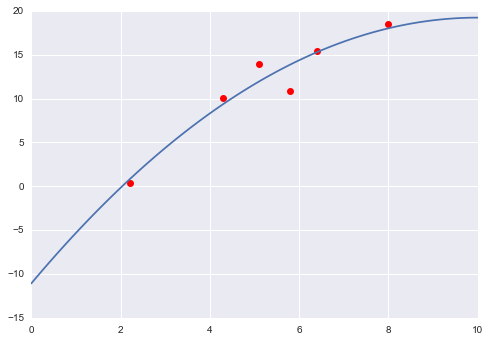

In [11]:
b0,b1,b2 = fmin(sum_squares_quad, [1,1,-1], args=(x,y))
print('\nintercept: {0:.2}, x: {1:.2}, x2: {2:.2}'.format(b0,b1,b2))
plt.plot(x, y, 'ro')
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Although polynomial model characterizes a nonlinear relationship, it is a linear problem in terms of estimation. That is, the regression model $f(y | x)$ is linear in the parameters.

For some data, it may be reasonable to consider polynomials of order>2. For example, consider the relationship between the number of home runs a baseball player hits and the number of runs batted in (RBI) they accumulate; clearly, the relationship is positive, but we may not expect a linear relationship.

In [12]:
sum_squares_cubic = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) 
                                  - theta[3]*(x**3)) ** 2)

Optimization terminated successfully.
         Current function value: 4274.128398
         Iterations: 230
         Function evaluations: 407


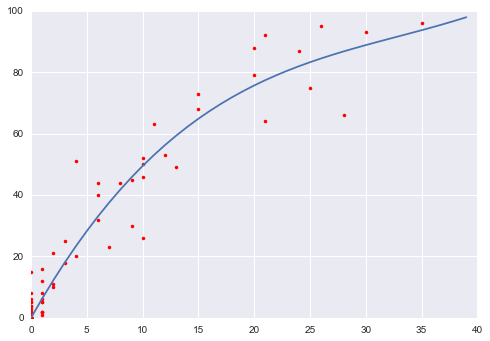

In [13]:
bb = pd.read_csv("../data/baseball.csv", index_col=0)
plt.plot(bb.hr, bb.rbi, 'r.')
b0,b1,b2,b3 = fmin(sum_squares_cubic, [0,1,-1,0], args=(bb.hr, bb.rbi))
xvals = np.arange(40)
plt.plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

### Exercise: Polynomial function

Write a function that specifies a polynomial of arbitrary degree.

In [14]:
# Write your answer here

In practice, we need not fit least squares models by hand because they are implemented generally in packages such as [`scikit-learn`](http://scikit-learn.org/) and [`statsmodels`](https://github.com/statsmodels/statsmodels/). For example, `scikit-learn` package implements least squares models in its `LinearRegression` class:

In [15]:
from sklearn import linear_model

straight_line = linear_model.LinearRegression()
straight_line.fit(x[:, np.newaxis], y)

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
straight_line.coef_

array([ 3.])

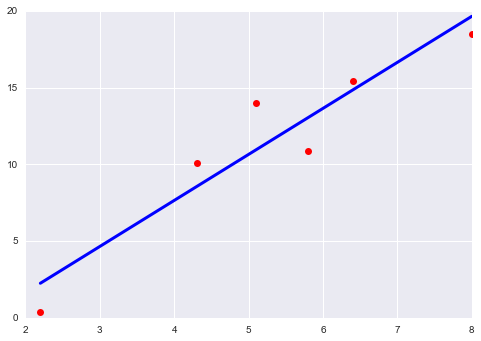

In [17]:
plt.plot(x, y, 'ro')
plt.plot(x, straight_line.predict(x[:, np.newaxis]), color='blue',
         linewidth=3)

For more general regression model building, its helpful to use a tool for describing statistical models, called `patsy`. With `patsy`, it is easy to specify the desired combinations of variables for any particular analysis, using an "R-like" syntax. `patsy` parses the formula string, and uses it to construct the approriate *design matrix* for the model.

For example, the quadratic model specified by hand above can be coded as:

In [18]:
from patsy import dmatrix

X = dmatrix('x + I(x**2)')
np.asarray(X)

array([[  1.  ,   2.2 ,   4.84],
       [  1.  ,   4.3 ,  18.49],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.8 ,  33.64],
       [  1.  ,   6.4 ,  40.96],
       [  1.  ,   8.  ,  64.  ]])

The `dmatrix` function returns the design matrix, which can be passed directly to the `LinearRegression` fitting method.

In [19]:
poly_line = linear_model.LinearRegression(fit_intercept=False)
poly_line.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [20]:
poly_line.coef_

array([-11.07482091,   6.05769181,  -0.30267997])

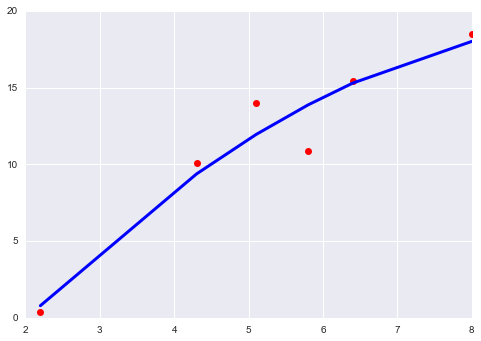

In [21]:
plt.plot(x, y, 'ro')
plt.plot(x, poly_line.predict(X), color='blue',
         linewidth=3)

## Model Selection

How do we choose among competing models for a given dataset? More parameters are not necessarily better, from the standpoint of model fit. For example, fitting a 9-th order polynomial to the sample data from the above example certainly results in an overfit.

Optimization terminated successfully.
         Current function value: 7.015262
         Iterations: 663
         Function evaluations: 983


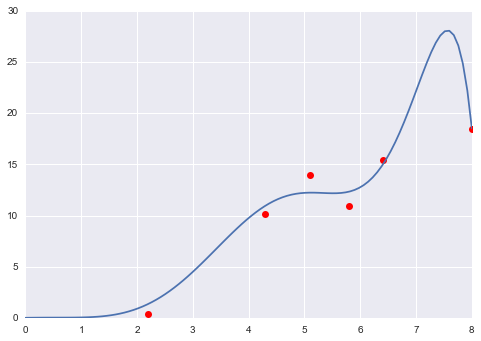

In [22]:
def calc_poly(params, data):
        x = np.c_[[data**i for i in range(len(params))]]
        return np.dot(params, x)
    
sum_squares_poly = lambda theta, x, y: np.sum((y - calc_poly(theta, x)) ** 2)
betas = fmin(sum_squares_poly, np.zeros(10), args=(x,y), maxiter=1e6)
plt.plot(x, y, 'ro')
xvals = np.linspace(0, max(x), 100)
plt.plot(xvals, calc_poly(betas, xvals))

One approach is to use an information-theoretic criterion to select the most appropriate model. For example **Akaike's Information Criterion (AIC)** balances the fit of the model (in terms of the likelihood) with the number of parameters required to achieve that fit. We can easily calculate AIC as:

$$AIC = n \log(\hat{\sigma}^2) + 2p$$

where $p$ is the number of parameters in the model and $\hat{\sigma}^2 = RSS/(n-p-1)$.

Notice that as the number of parameters increase, the residual sum of squares goes down, but the second term (a penalty) increases.

To apply AIC to model selection, we choose the model that has the **lowest** AIC value.

In [23]:
n = len(x)

aic = lambda rss, p, n: n * np.log(rss/(n-p-1)) + 2*p

RSS1 = sum_of_squares(fmin(sum_of_squares, [0,1], args=(x,y)), x, y)
RSS2 = sum_squares_quad(fmin(sum_squares_quad, [1,1,-1], args=(x,y)), x, y)

print('\nModel 1: {0}\nModel 2: {1}'.format(aic(RSS1, 2, n), aic(RSS2, 3, n)))

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372

Model 1: 15.781658357173654
Model 2: 17.675936801895737


Hence, on the basis of "information distance", we would select the 2-parameter (linear) model.

## Logistic Regression

Fitting a line to the relationship between two variables using the least squares approach is sensible when the variable we are trying to predict is continuous, but what about when the data are dichotomous?

- male/female
- pass/fail
- died/survived

Let's consider the problem of predicting survival in the Titanic disaster, based on our available information. For example, lets say that we want to predict survival as a function of the fare paid for the journey.

In [24]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.name

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

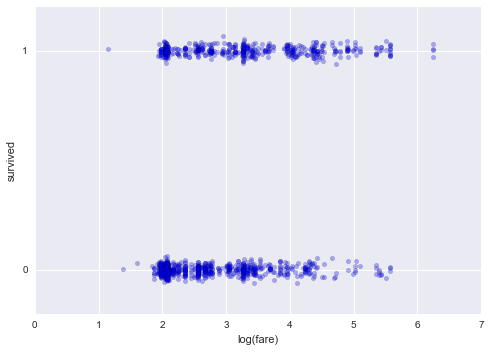

In [25]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha=0.3)
plt.yticks([0,1])
plt.ylabel("survived")
plt.xlabel("log(fare)")

I have added random jitter on the y-axis to help visualize the density of the points, and have plotted fare on the log scale.

Clearly, fitting a line through this data makes little sense, for several reasons. First, for most values of the predictor variable, the line would predict values that are not zero or one. Second, it would seem odd to choose least squares (or similar) as a criterion for selecting the best line.

In [26]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(sum_of_squares, [1,1], args=(x,y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


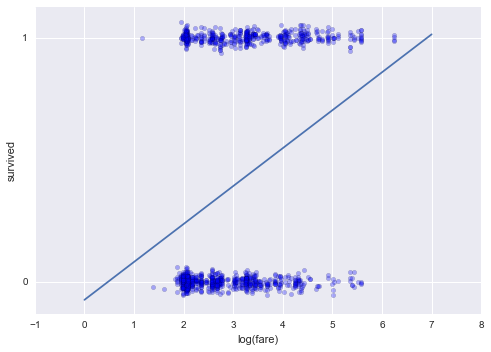

In [27]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
plt.scatter(np.log(titanic.fare), titanic.survived + jitter, alpha=0.3)
plt.yticks([0,1])
plt.ylabel("survived")
plt.xlabel("log(fare)")
plt.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

If we look at this data, we can see that for most values of `fare`, there are some individuals that survived and some that did not. However, notice that the cloud of points is denser on the "survived" (`y=1`) side for larger values of fare than on the "died" (`y=0`) side.

### Stochastic model

Rather than model the binary outcome explicitly, it makes sense instead to model the *probability* of death or survival in a **stochastic** model. Probabilities are measured on a continuous [0,1] scale, which may be more amenable for prediction using a regression line. We need to consider a different probability model for this exerciese however; let's consider the **Bernoulli** distribution as a generative model for our data:

<div style="font-size: 120%;">  
$$f(y|p) = p^{y} (1-p)^{1-y}$$ 
</div>  

where $y = \{0,1\}$ and $p \in [0,1]$. So, this model predicts whether $y$ is zero or one as a function of the probability $p$. Notice that when $y=1$, the $1-p$ term disappears, and when $y=0$, the $p$ term disappears.

So, the model we want to fit should look something like this:

<div style="font-size: 120%;">  
$$p_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

However, since $p$ is constrained to be between zero and one, it is easy to see where a linear (or polynomial) model might predict values outside of this range. We can modify this model sligtly by using a **link function** to transform the probability to have an unbounded range on a new scale. Specifically, we can use a **logit transformation** as our link function:

<div style="font-size: 120%;">  
$$\text{logit}(p) = \log\left[\frac{p}{1-p}\right] = x$$
</div>

Here's a plot of $p/(1-p)$

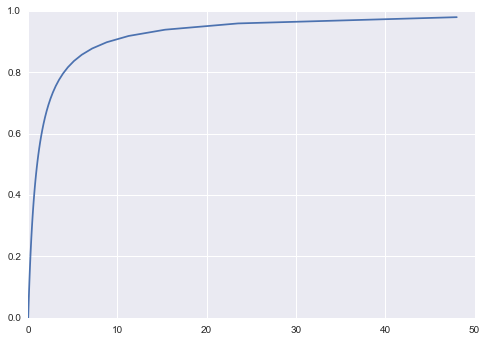

In [28]:
logit = lambda p: np.log(p/(1.-p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)

And here's the logit function:

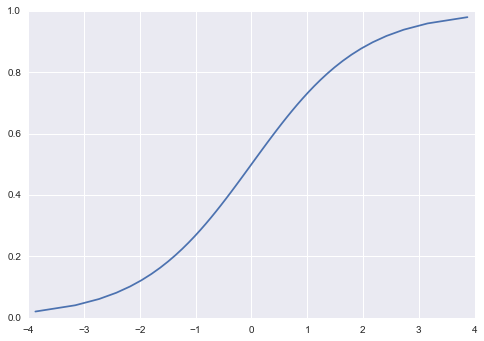

In [29]:
plt.plot(logit(unit_interval), unit_interval)

The inverse of the logit transformation is:

<div style="font-size: 150%;">  
$$p = \frac{1}{1 + \exp(-x)}$$
</div>

In [30]:
invlogit = lambda x: 1. / (1 + np.exp(-x))

So, now our model is:

<div style="font-size: 120%;">  
$$\text{logit}(p_i) = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

We can fit this model using maximum likelihood. Our likelihood, again based on the Bernoulli model is:

<div style="font-size: 120%;">  
$$L(y|p) = \prod_{i=1}^n p_i^{y_i} (1-p_i)^{1-y_i}$$
</div>

which, on the log scale is:

<div style="font-size: 120%;">  
$$l(y|p) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
</div>

We can easily implement this in Python, keeping in mind that `fmin` minimizes, rather than maximizes functions:

In [31]:
def logistic_like(theta, x, y):
    
    p = invlogit(theta[0] + theta[1] * x)
    
    # Return negative of log-likelihood
    return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))

Remove null values from variables

In [32]:
x, y = titanic[titanic.fare.notnull()][['fare', 'survived']].values.T

... and fit the model.

In [33]:
b0, b1 = fmin(logistic_like, [0.5,0], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.88238984528338194, 0.012452067664164127)

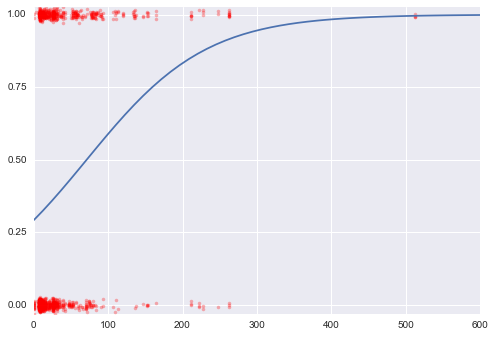

In [34]:
jitter = np.random.normal(scale=0.01, size=len(x))
plt.plot(x, y+jitter, 'r.', alpha=0.3)
plt.yticks([0,.25,.5,.75,1])
xvals = np.linspace(0, 600)
plt.plot(xvals, invlogit(b0+b1*xvals))

As with our least squares model, we can easily fit logistic regression models in `scikit-learn`, in this case using the `LogisticRegression`.

In [35]:
logistic = linear_model.LogisticRegression()
logistic.fit(x[:, np.newaxis], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
logistic.coef_

array([[ 0.0123847]])

### Exercise: multivariate logistic regression

Which other variables might be relevant for predicting the probability of surviving the Titanic? Generalize the model likelihood to include 2 or 3 other covariates from the dataset.

In [61]:
# Write your answer here